In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

In [ ]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [ ]:
# Normal function
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.99014354],
       [3.01824416]])

# Batch Gradient descent 

In [ ]:
import numpy as np

alpha = 0.1 # learning rate 
n_iterations = 1000 
N = 100

theta = np.random.randn(2,1) # random initialization

In [ ]:
theta

array([[ 0.06305785],
       [-0.61396751]])

In [ ]:
for iteration in range(n_iterations):
    gradients = 1/N * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - alpha * gradients

In [ ]:
theta

array([[3.99014353],
       [3.01824417]])

In [ ]:
import matplotlib.pyplot as plt

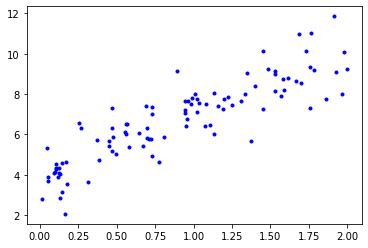

In [ ]:
plt.plot(X, y, "b.")

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(eta), fontsize=16)

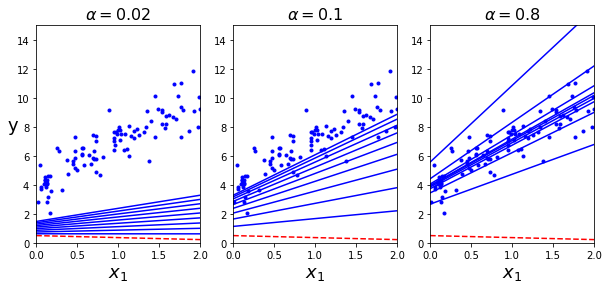

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.8)

plt.show()

# Stochastic Gradient Descent 

In [ ]:
n_epochs = 50
t0, t1 = 5, 50      # learning schedule hyperparameters
alpha = 0.1         # learning rate 
N = 100

def learning_schedule(t): 
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs): 
    for i in range(N):
        random_index = np.random.randint(N)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(epoch * N + i)
        theta = theta - alpha * gradients

In [ ]:
theta

array([[4.03738889],
       [2.98711217]])

In [ ]:
from sklearn.linear_model import SGDRegressor #Stochastic Gradient Descent:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) 

sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.92738383]), array([2.99875792]))

In [ ]:
X_b[random_index:random_index+1]

array([[1.        , 0.01554812]])

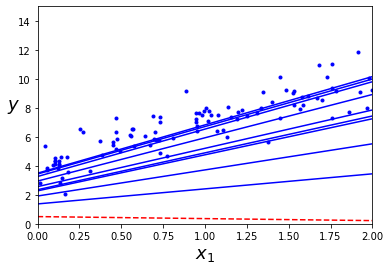

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 10:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown                               
plt.show()                              

# Mini-batch Gradient Descent

In [ ]:
X_b_shuffled

array([[1.        , 0.95267378],
       [1.        , 1.66837291],
       [1.        , 1.99462329],
       [1.        , 1.24967144],
       [1.        , 0.1196805 ],
       [1.        , 0.46761129],
       [1.        , 1.86260322],
       [1.        , 1.39724173],
       [1.        , 0.09479094],
       [1.        , 1.00623014],
       [1.        , 1.33475921],
       [1.        , 0.5529471 ],
       [1.        , 0.45076926],
       [1.        , 0.2711034 ],
       [1.        , 1.10629514],
       [1.        , 1.68285362],
       [1.        , 0.88921383],
       [1.        , 0.95408565],
       [1.        , 1.72843264],
       [1.        , 0.72890257],
       [1.        , 0.94655856],
       [1.        , 0.73007289],
       [1.        , 0.99158273],
       [1.        , 0.10433541],
       [1.        , 1.44834436],
       [1.        , 1.19380875],
       [1.        , 1.58497037],
       [1.        , 1.34478115],
       [1.        , 0.70808044],
       [1.        , 0.46719487],
       [1.

In [ ]:
X_b_shuffled[i:i+minibatch_size]

array([[1.        , 0.69844681]])

In [ ]:
n_epochs = 50
t0, t1 = 5, 50      # learning schedule hyperparameters
alpha = 0.1         # learning rate 
N = 100
minibatch_size = 20

def learning_schedule(t): 
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs): 
    shuffled_indices = np.random.permutation(N)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(N):
        random_index = np.random.randint(N)
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(epoch * N + i)
        theta = theta - alpha * gradients

In [ ]:
theta

array([[3.93332517],
       [3.00205236]])

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

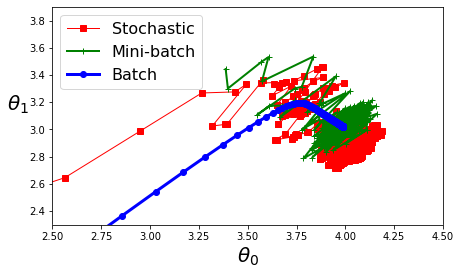

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()